# Лабораторная работа №2


Цель работы - практическое применение дискретного преобразования Фурье для анализа речевых сигналов.

###Задачи
1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.
2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса
3. Построить сонограмму по записи своего голоса.

## Требуется загрузить аудио с названием "audio_voice.wav"

In [ ]:
#!wget https://github.com/aaapetrova/DSP/blob/9ccfb7ad86db18cafcb936cb4ae858370570d818/audio_voice.wav
path_to_wave = "/content/anna_voice.wav"

### Needed imports

In [ ]:
# Needed imports
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile
from scipy.fftpack import fft, dct
import matplotlib.pyplot as plt
from itertools import zip_longest
import more_itertools as mits

Sample rate: 48000 Hz
Total time: 3.96s


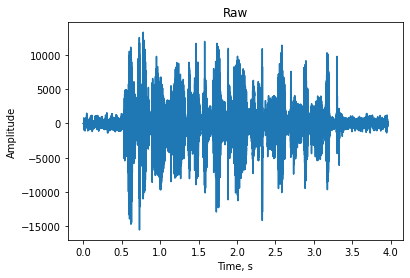

In [ ]:
frame_rate, sound_data = wavfile.read(path_to_wave)
time                   = np.arange(0,len(sound_data))/frame_rate

sound_data = sound_data.T[0]
# Show information about the object
print('Sample rate:',frame_rate,'Hz')
print(f'Total time: {len(sound_data)/frame_rate}s')

plt.plot(time, sound_data)
plt.title("Raw")
plt.xlabel("Time, s")
plt.ylabel("Amplitude")

plt.show()

In [ ]:
Audio(sound_data,rate=frame_rate)

#  F0



In [ ]:
dimension = 2 ** 8
spctr = round(frame_rate/dimension)
overlap = 0.25

f

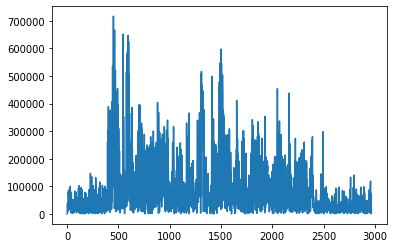

In [ ]:
seqs = list(mits.windowed(sound_data, n=dimension, step=int(overlap * dimension)))
prep_seqs = list()
for val in seqs[-1]:
    if val is not None:
        prep_seqs.append(val)
seqs[-1] = prep_seqs

seqs = [i * np.hamming(len(i)) for i in seqs]

for index, element in enumerate(seqs):
    seqs[index] = fft(element)

spector = []
for element in seqs:
    spector.append(sum([k ** 2 for k in element[:int(len(element) / 2)]]) ** 0.5)

spector = np.array([el.real for el in spector])
plt.plot(spector)
plt.show()


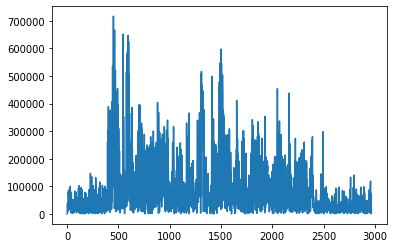

In [ ]:
sr = int(frame_rate / dimension)
limit_k = 2
F0 = []

trace = [spector[k:k + sr] for k in range(len(spector))[::sr]]


for element in trace:
    #print(element.mean(), element.max(), element.max() > element.mean() * limit_k)
    limit = element.mean() * limit_k
    if element.max() > limit:
        F0 += list(element)
    else:
        F0 += list(np.zeros(len(element)))

plt.plot(F0)
plt.show()

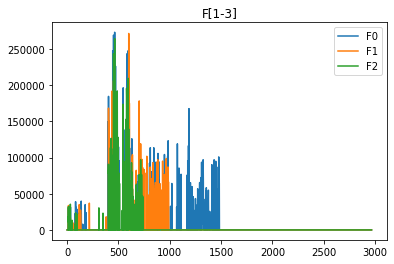

In [ ]:
# calculate Fi
length_f0 = len(F0)
def calculate_F(index_f):
  result = []
  index_f += 1
  for i in range(length_f0):
    if index_f * i + 1 >= length_f0 or index_f * i -  1 < 0:
      result.append([0])
    else:
      limit = max(F0[index_f *  i - 1], F0[index_f *  i], F0[index_f *  i + 1])
      if F0[i] > limit_k * limit:
          result.append([limit])
      else:
          result.append([0])
  return result 

F = []
for i in range(1, 4):
  F.append(calculate_F(i))
fig, ax = plt.subplots()
ax.set_title("F[1-3]")
for idx, f in enumerate(F):
  ax.plot(f, label=f"F{idx}")
ax.legend()
plt.show()

 ## Сонограмма





In [ ]:
trace = [spector[k:k + sr] for k in range(len(spector))[::sr]]
amp = []

for i in trace[:-1]:
  amp.append(i)
amp = np.array(amp)
import plotly.express as px
fig = px.imshow(amp)
fig.show()

 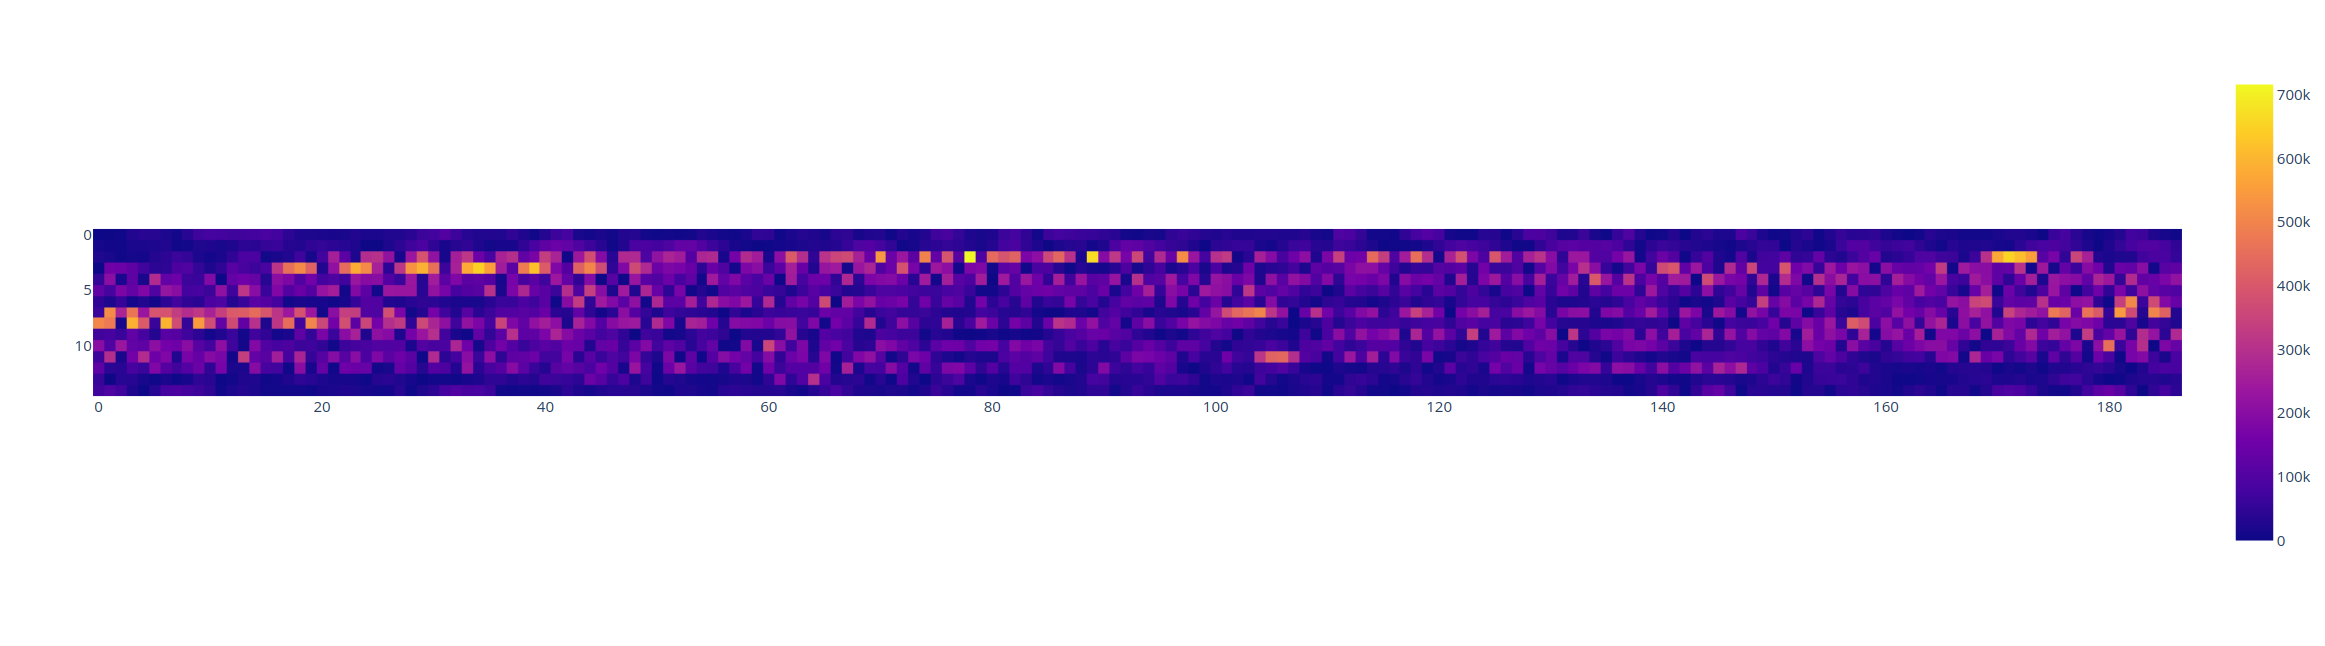

## Вывод


Выполнение данной лабораторной работы закрепило практические навыки работы с библиотеками языка программирования Python: matplotlib, scipy, numpy. С помощью них обрабатывались звуковые сигналы, выполнялось дискретное преобразование Фурье, чтобы анализировать речевые сигналы.